# Chapter 11

# 11.6.3. PK/PD modeling of a hypothetical drug

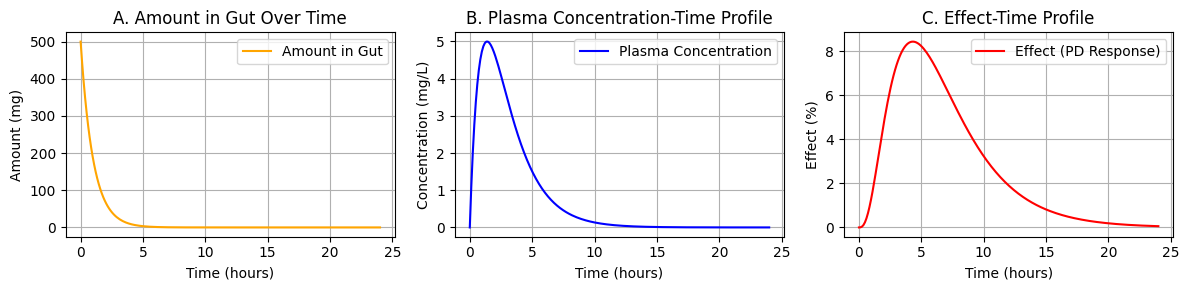

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the integrated PK/PD model (effect compartment)
def pk_pd_model(y, t, ka, ke, ke0, Vd):
    A_gut, C_plasma, C_effect = y  # Amount in gut, plasma concentration, effect compartment concentration
    
    # PK: Amount in gut (A_gut)
    dA_gut_dt = -ka * A_gut
    
    # PK: Plasma concentration (C_plasma)
    dC_plasma_dt = (ka * A_gut) / Vd - ke * C_plasma
    
    # Effect compartment concentration (C_effect)
    dC_effect_dt = ke0 * (C_plasma - C_effect)
    
    return [dA_gut_dt, dC_plasma_dt, dC_effect_dt]

# Parameters for the model
Dose = 500       # Dose in mg
ka = 1.0         # Absorption rate constant (1/hour)
ke = 0.5         # Elimination rate constant (1/hour)
ke0 = 0.2        # Transfer rate constant between plasma and effect compartment (1/hour)
Vd = 50          # Volume of distribution (L)
Emax = 100       # Maximum effect (%)
EC50 = 10        # Concentration producing 50% of maximum effect (mg/L)
s = 1.5          # Hill coefficient

# Time points (hours)
time = np.linspace(0, 24, 200)

# Initial conditions: A_gut(0) = Dose, C_plasma(0) = 0, C_effect(0) = 0
initial_conditions = [Dose, 0, 0]

# Solve the system of ODEs using odeint
solution = odeint(pk_pd_model, initial_conditions, time, args=(ka, ke, ke0, Vd))

A_gut = solution[:, 0]
C_plasma = solution[:, 1]
C_effect = solution[:, 2]

# Calculate the pharmacodynamic effect using the Hill equation
Effect = (Emax * C_effect**s) / (EC50**s + C_effect**s)

# Plot the concentration-time and effect-time profiles
fig, ax = plt.subplots(1, 3, figsize=(12, 3))

# Plot amount in gut vs. time
ax[0].plot(time, A_gut, label='Amount in Gut', color='orange')
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Amount (mg)')
ax[0].set_title('A. Amount in Gut Over Time')
ax[0].legend()
ax[0].grid(True)

# Plot plasma concentration vs. time
ax[1].plot(time, C_plasma, label='Plasma Concentration', color='blue')
ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Concentration (mg/L)')
ax[1].set_title('B. Plasma Concentration-Time Profile')
ax[1].legend()
ax[1].grid(True)

# Plot effect vs. time
ax[2].plot(time, Effect, label='Effect (PD Response)', color='red')
ax[2].set_xlabel('Time (hours)')
ax[2].set_ylabel('Effect (%)')
ax[2].set_title('C. Effect-Time Profile')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()